In [2]:
#| include: false

%%capture
!pip uninstall -y plotly
!pip install plotly==6.1.1 # for kaleido compatibility
!pip install -U kaleido==1.0.0

In [13]:
#| include: false

!plotly_get_chrome -y # plotly requires chrome ?

# then restart session and run all below

Installing Chrome for Plotly...
Chrome installed successfully.
The Chrome executable is now located at: /usr/local/lib/python3.12/dist-packages/choreographer/cli/browser_exe/chrome-linux64/chrome


In [2]:
#| include: false

import plotly.io as pio
# render plots for quarto (not colab)
pio.renderers.default = "plotly_mimetype+notebook_connected"

# The AlphaVantage API

As mentioned, the [AlphaVantage API](https://www.alphavantage.co/) provides a wealth of financial and economic datasets.

## Setup

To make requests for this data, we first need to obtain an API key. It is possible to obtain your own key using their [sign up form](https://www.alphavantage.co/support/#api-key), or just use one of the prof's "premium keys".

Before moving on, set this credential it as a notebook secret called `ALPHAVANTAGE_API_KEY`.

Reading the credential from notebook secrets:

In [3]:
from google.colab import userdata

API_KEY = userdata.get("ALPHAVANTAGE_API_KEY")

## Example: Unemployment Data

For these examples, we will fetch some historical unemployment data.

Before we start it will be necessary to read the documentation for this endpoint:

<https://www.alphavantage.co/documentation/#unemployment>


After reading the docs, we see we are able to request this data in either JSON or CSV format. We will start by fetching this data in JSON format, and then also alternatively demonstrate how to fetch the data in CSV format.

### JSON Format

Fetching the data in JSON format:

In [4]:
import requests

#url = "https://www.alphavantage.co/query?function=UNEMPLOYMENT&apikey=demo"
url = f"https://www.alphavantage.co/query?function=UNEMPLOYMENT&apikey={API_KEY}"

response = requests.get(url)
response

<Response [200]>

Investigating and parsing the nested structure:

In [5]:
parsed_response = response.json()
print(type(parsed_response))
parsed_response.keys()

<class 'dict'>


dict_keys(['name', 'interval', 'unit', 'data'])

In [6]:
print("NAME:", parsed_response["name"])
print("INTERVAL:", parsed_response["interval"])
print("UNIT:", parsed_response["unit"])

NAME: Unemployment Rate
INTERVAL: monthly
UNIT: percent


In [7]:
data = parsed_response["data"]
print(type(data))
len(data)

<class 'list'>


931

We see a list of around a thousand data points. Each one is a dictionary that looks like this:

In [8]:
data[0]

{'date': '2025-07-01', 'value': '4.2'}

The unemployment rate value is a string, but we need it to be numeric, so we take a moment to make a clean version of the data:

In [9]:
clean_data = []
for item in data:
    clean_data.append({"date": item["date"], "rate": float(item["value"])})

clean_data[0]

{'date': '2025-07-01', 'rate': 4.2}

Now we are able to perform arithmetic calculations with the data, and also chart it properly.

Making a line chart of the data over time:

In [ ]:
#| output: false

import plotly.express as px

dates = [item["date"] for item in clean_data]
rates = [item["rate"] for item in clean_data]

fig = px.line(x=dates, y=rates, height=350,
              title=f"US Unemployment Rates ({parsed_response['interval']})",
              labels={"x": "Date", "y": "Unemployment Rate (%)"}
            )
fig.show()

::: {.content-visible when-format="html"}


In [10]:
#| echo: false

fig.show()

:::

::: {.content-visible when-format="pdf"}

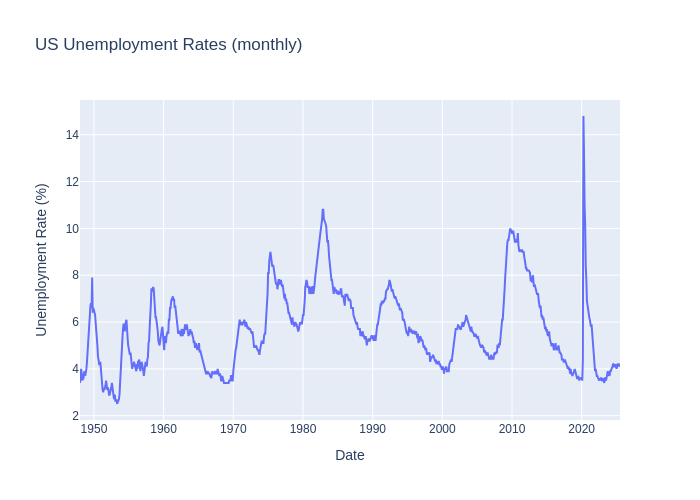

In [11]:
#| echo: false

fig.show(renderer="png")

:::

### CSV Format

After reading the docs, we learn that in order to fetch the data in CSV format, we need to append `&datatype=csv` to the end of the request URL.

Fetching the data in CSV format:

In [12]:
from pandas import read_csv

url = f"https://www.alphavantage.co/query?function=UNEMPLOYMENT&apikey={API_KEY}"
url += "&datatype=csv"

df = read_csv(url)
df.rename(columns={"timestamp": "date", "value": "rate"}, inplace=True)
df.head()

,date,rate
0,2025-07-01,4.2
1,2025-06-01,4.1
2,2025-05-01,4.2
3,2025-04-01,4.2
4,2025-03-01,4.2


This gives us a `pandas` `DataFrame` datatype. It doesn't contain some of the context as the JSON formatted response, (like the interval), but the data is already in a clean format with numeric rates.

Making a line chart of the data over time:

In [ ]:
#| output: false

import plotly.express as px

fig = px.line(x=df["date"], y=df["rate"], height=350,
              title=f"US Unemployment Rates (monthly)",
              labels={"x": "Date", "y": "Unemployment Rate (%)"}
            )
fig.show()

::: {.content-visible when-format="html"}

In [13]:
#| echo: false

fig.show()

:::

::: {.content-visible when-format="pdf"}

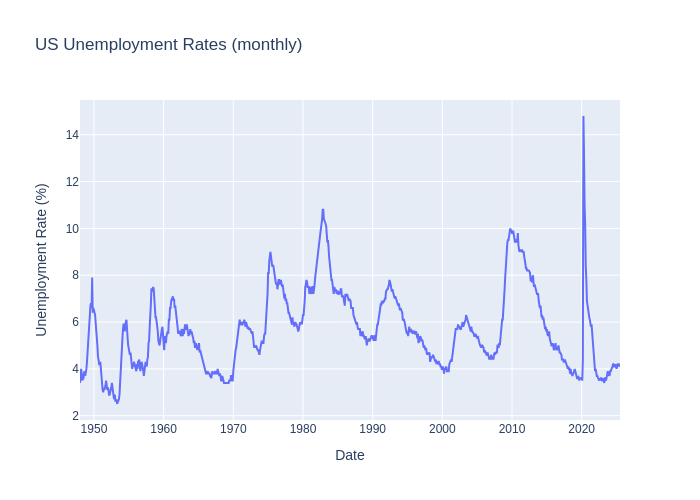

In [14]:
#| echo:false
fig.show(renderer="png")

<!--
:::

-->

Alright, that's it!

With these examples complete, now you should feel confident in your ability to fetch and process any of the other datasets from the API.